# Getting Started with Kaggle 

Kaggle is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set

Kaggle Kernels is a cloud computational environment that enables reproducible and collaborative analysis. Kernels supports scripts in R and Python, Jupyter Notebooks, and RMarkdown reports.
Kernels is an in-browser computational environment that is fully integrated with most competition datasets. Kernels is preloaded with most data science packages and libraries. It supports scripts and Jupyter Notebooks in R and Python, as well as RMarkdown reports. You can create submission files with Kernels and also use it to explore the competition data.

# Titanic

This competition for beginner is about predicting which passengers survived the singking of the Titanic.

In this competition, we have a dataset of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not.

Each Kaggle competition has two key data files that you will work with - a training set and a testing set.

The training contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case: Survival

The testing set contains all of the same feature columns, but it is missing the target value column. Additionally, the testing set usually has fewer observations (row) than the training set.

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

## Data Description

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the "ground truth") for each passenger. Your model will be based on "features" like passengers' gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submittion.csv, a set of that assume all and only femal passengers survive, as an example of what a submission file should look like.

In [2]:
import pandas as pd

We use pandas.read_csv() to import train.csv and assign it to the variable train.
We use DataFrame.shape to calculate the number of rows and columns in train, and assign the result to train_shape

In [9]:
train = pd.read_csv("train.csv")
train_shape=train.shape
train_shape

(891, 12)

We do the same with test.csv 

In [10]:
test = pd.read_csv("test.csv")
test_shape = test.shape
test_shape

(418, 11)

# A Data Science Framework

1. Define the Problem
2. Gather the Data
3. Prepare Data for Consumption
4. Perform Exploratory Analysis
5. Model Data
6. Validate and Implement Data Model
7. Optimize and Strategize


# Step 1: Define the Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of the 2224 passengers and crew. This sensational tragedy shocked the international community and let to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children and the upper-class.

The type of machine learning we will be doing is called classification, because when we make predictions, we are classifying each passenger as survived or not. More specifically, we are performing binary classification which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Women and Children were given preference to lifeboats. As well, notice the vast class disparity of the passengers.

This indicates that Age, Sex, and Pclass may be good predictors of survival.

# Step 2: Gather the Data

Let's explore Sex and Pclass by visualizing the data.

Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table():

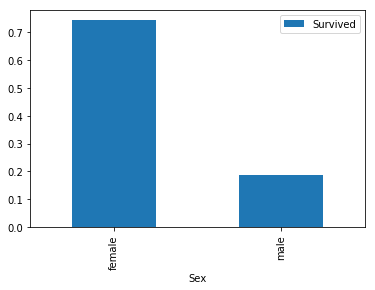

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

We can immediately see that females survived in much higher proportions than males did.

Let's do the same with the Pclass column

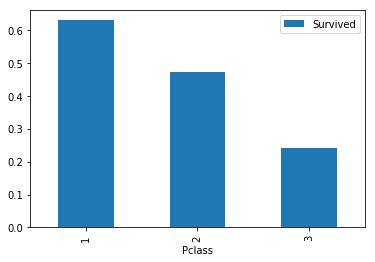

In [13]:
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

## Meet and Greet Data

This is the meet and greet step. Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature varaibles), what's its goals in life (dependent/target variables).

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs. quantitative).

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0,NaN,S


In [19]:
print('Train columns with null values:\n', train.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pernot, Mr. Rene",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


The sex and PClase column are what we call categorical features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).

Let's look at the Age column using series.describe()

In [24]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age needs to be treated slightly differently as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. 

We can create two histograms to compare visually the those that survived vs. those who died across different age ranges:

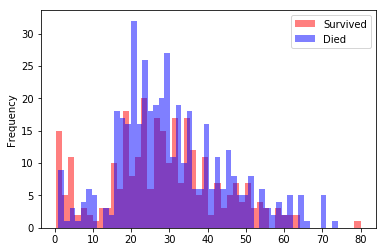

In [25]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this conitnuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

The pandas.cut() function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of lables for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

In [26]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

In [27]:
print('Train columns with null values:\n', train.isnull().sum())

Train columns with null values:
 PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_categories      0
dtype: int64


In [28]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,Adult


# Step 3: Prepare Data for Consumption

## The 4C's of Data Cleaning: Correction, Completing, Creating, and Converting

In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation

### 1) Correcting

Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age=800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.

### 2) Completing

There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is input using mode. A basic methodology for quantitative data is input using mean, median, or mean+randomized standard deviation. For this dataset, age will be inputed with the median, the cabin attribute will be dropped, and embark will be inputed with mode.

### 3) Creating

Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict outcome.

### 4) Converting

Last, but certainly not least, we will deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations.

### 1) Correcting

In [21]:
train_clean = train

In [31]:
#complete missing age with median
train_clean["Age"].fillna(train_clean["Age"].median(), inplace = True)
    
#complete embarked with mode
train_clean["Embarked"].fillna(train_clean["Embarked"].mode()[0], inplace = True)
    
#complete missing fare with median
train_clean["Fare"].fillna(train_clean["Fare"].median(), inplace = True)

#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId', 'Cabin', 'Ticket']
train_clean.drop(drop_column, axis=1, inplace = True)

print(train_clean.isnull().sum())

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Age_categories    0
dtype: int64


So far we have identified three columns that may be useful for predicting survival:
Sex
Pclass
Age, or more specifically the created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass, we know they are 1,2, and 3.

In [33]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 3) Creating - Feature Engineering

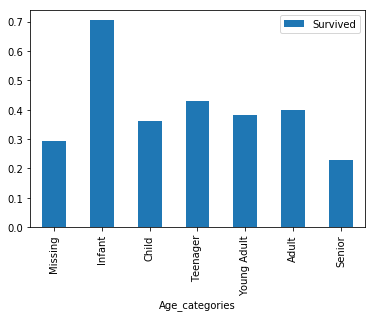

In [45]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_pivot = train.pivot_table(index="Age_categories", values="Survived")
age_pivot.plot.bar()
plt.show()

In [48]:
#Discrete variables
train_clean['FamilySize'] = train_clean['SibSp'] + train_clean['Parch'] + 1

#initialize to yes/1 is alone
train_clean['IsAlone'] = 1
#now update to no/0 if family size is greater than 1
train_clean['IsAlone'].loc[train_clean['FamilySize'] > 1]= 0

#split title from name
train_clean['Title'] = train_clean['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

C:\Users\I339205\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
train_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,FamilySize,IsAlone,Title
0,0,0,0,0,0.0,0,0,0.0000,0,Young Adult,1,1,NaN
1,0,0,0,0,0.0,0,0,0.0000,0,Adult,1,1,NaN
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,1,1,Miss
3,0,0,0,0,0.0,0,0,0.0000,0,Young Adult,1,1,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1,1,Mr
5,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Missing,1,1,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult,1,1,Mr
7,0,0,0,0,0.0,0,0,0.0000,0,Infant,1,1,NaN
8,0,0,0,0,0.0,0,0,0.0000,0,Young Adult,1,1,NaN
9,0,0,0,0,0.0,0,0,0.0000,0,Teenager,1,1,NaN


### 4) Converting

While the class of each passenger certainly has some sort of ordered relationship between each class is not the same as the relationship between the number 1, 2, and 3. For instance, class 2 usn't worth double what class 1 is and class 3 usn't worth triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass


In [34]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

In [35]:
train.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
250,0,3,"Reed, Mr. James George",male,-0.5,0,0,7.25,S,Missing,0,0,1


In [36]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

In [38]:
train.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
294,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,7.8958,S,Young Adult,0,0,1,0,1


In [39]:
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [40]:
train.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
543,1,2,"Beane, Mr. Edward",male,32.0,1,0,26.0,S,Young Adult,...,0,0,1,0,0,0,0,1,0,0


# Step 4 - Perform Exploratory Analysis with Statistics

Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, we will classify features and determine their correlation with the target variable and each other.

In [50]:
# Discrete Variable Correlation by Survival using group by aka pivot table

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [51]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [53]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [54]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

### Observations.

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

### Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

In [58]:
import seaborn as sns

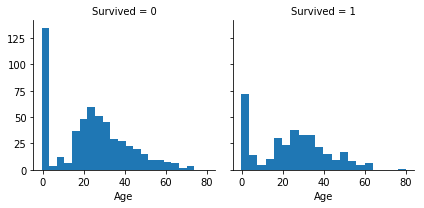

In [59]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

### Observations.

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

### Decisions.

Consider Pclass for model training.

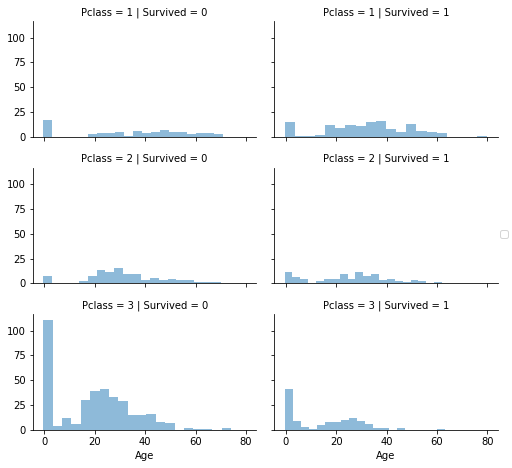

In [60]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Correlating categorical features
Now we can correlate categorical features with our solution goal.

### Observations.

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

### Decisions.

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

C:\Users\I339205\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\I339205\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


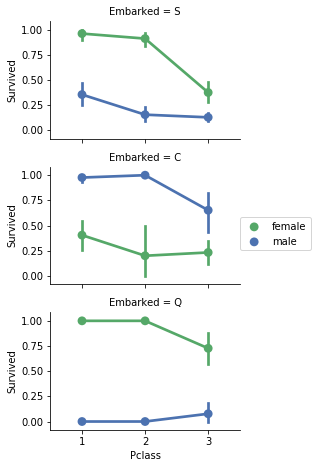

In [62]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

### Observations.

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

### Decisions.

Consider banding Fare feature.

C:\Users\I339205\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


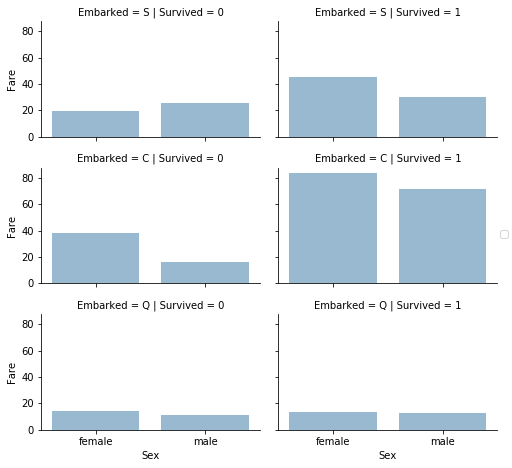

In [64]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Step 5 - Model Data

## Logistic Regression

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will use the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:
 - initiate (or create) the specific machine learning model you want to use
 - fit the model with the training data
 - use the model to make predictions
 - evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

Lastly, we use the LogisticRegression.fit() method to train our model. The .fit() method accept two arguments: x and y. x must be a two dimmensional array (like a dataframe) of the features we whish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict

In [44]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We have trained our first machine learning model. The next step is to find out how accurate our model is, and to do that we will have to make some predictions.

We can fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will overfit, which means it will perform well because we are testing on the same data we have trained on, but then perfrm much worse on new, unseen data.

Instead, we can split our train dataframe into two:
 - one part to train our model on (often 80% of the observations)
 - one part to make predictions with and test our model (often 20% of the observations)
 
The scikit-learn library has a handy model_selection.train_test_split() function that we can use to split our data. train_test_plit() accepts two parameters, x and y, which contain all the data we want to train and test on, and returns four objects: train_X, train_y, test_X, test_y

In [65]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_2', 'Pclass_3', 'Sex_male']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

There are two other parameters we used: test_size, which lets us control what proportions our data are split into, and random_state. The train_test_split() function randomizes observations before dividing them, and setting a random seed means that our results will be reproductible, which is important if you are collaborating, or need to produce consistent results each time

In [81]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

We can now fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the LogisticRegression.predict() method to make predictions.

The predict() method takes a single parameter X, a two dimensional array of features for the observations we wish to predict. X must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

In [77]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

There are a number of ways to measure the accuracy of machine learning models, but when competing in Kaggle, we want to use the same method as Kaggle.

In this case, the score is calculated as the percentage of passengers correctly predicted. This is by far the most common form of accuracy for binary classification.

Scikit-learn has a handy function we can use to claculate accuracy: metrics.accuracy_score(). The function accepts two parameters, y_true and y_pred, which are the actual values and our predicted values respectively and returns our accuracy score.

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
accuracy

0.8100558659217877

Our model has an accuracy score of 81% when test against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

The most common form of cross validation, and the one we will be using, is called k-fold cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. 

We will use scikit-learn's model_selection.cross_val_score(estimator, X,y, cv=None) function to automate the process. Estimator is a scikit-learn estimator object, like the Logisticregression() objects we have been creating. X is all features from our data set. y is the target variables. cv specifies the number of folds. The function returns a numpy ndarray of the accuracy scores of each fold.

It's worth noting that the cross_val_score() function can use a variety of cross validation techniques and scoring types, but it defaults to k-fold validation and accuracy scores for our input types.

In [79]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)

accuracy = scores.mean()

print(scores)
print(accuracy)

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]
0.8024670865963002


From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

As it happends, our average accuracy score was 80.2%, which is not far from 81.0% we got from our simple train/test split, however this will always be the case, and you should always use cross-validation to make sure the error metrics you are getting from your model are accurate.

In [83]:
holdout = test

lr = LogisticRegression()

lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])


The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file.


In [84]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [85]:
submission.to_csv('submission.csv', index=False)

# Improvements

There are two main areas we can focus on to boost the accuracy of our predictions:
 - Improving the features we train our model on
 - Improving the model itself

We will look at feature selection. Feature selection is important because it helps to exclude features which are not good predictors, or features that are closely related to each other. Both of these will cause our model to be less accurate, particularly on previous unseen data.

A well fit model is likely to make accurate predictions on previously unseen data. The key to creating a well-fit model is to select the right balance of features, and to create new features to train your model.

In [86]:
import pandas as pd

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df